In [1]:
import numpy as np
import pandas as pd
import string
import re
from IPython.core.display import HTML

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from collections import defaultdict
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.cluster import KMeans


# cambiador de formatos para factorizar un dataset
from sklearn.feature_extraction.text import TfidfVectorizer 

# control de rendimiento
from time import time

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
ruta = 'Opiniones.csv'
data = pd.read_csv(ruta)
# print(data.head())

In [3]:
display(HTML(data.sample(20).to_html()))

,AÑO,SEDE,FACULTAD,CARRERA,OBSERVACIONES
25918,2019.0,SEDE 3,FACULTAD 5,LICENCIATURA 20,Los precios para estudiantes es muy elevado
19567,2019.0,SEDE 6,FACULTAD 2,INGENIERIA 08,"Hagan más áreas de recreación, ya sean juegos de mesa o dejar la cancha de basket libre por que siempre que voy esta con un bus estacionado"
25759,2019.0,SEDE 1,FACULTAD 5,LICENCIATURA 21,Los modulos virtuales son buenisimos
2551,2019.0,SEDE 1,FACULTAD 5,INGENIERIA 25,.
19735,2019.0,SEDE 1,FACULTAD 6,POSTGRADO 12,hay preguntas que no aplican para un estudiante virtual
49114,2019.0,SEDE 1,FACULTAD 3,LICENCIATURA 08,Tener disponibilidad en las cafeterías después de las 8pm
32734,2019.0,SEDE 1,FACULTAD 3,LICENCIATURA 10,Mejorar el menú de la cafetería
28940,2019.0,SEDE 1,FACULTAD 3,INGENIERIA 28,Mas variedad en el menu
31981,2019.0,SEDE 6,FACULTAD 6,LICENCIATURA 24,Mejorar áreas de receso
46720,2019.0,SEDE 1,FACULTAD 5,INGENIERIA 23,Satisfecho


In [4]:
data.rename(columns={'AÑO':'YEAR'}, inplace=True)
print(data.head())

     YEAR    SEDE    FACULTAD          CARRERA OBSERVACIONES
0  2019.0  SEDE 2  FACULTAD 1  LICENCIATURA 03             0
1  2019.0  SEDE 2  FACULTAD 1  LICENCIATURA 04             0
2  2019.0  SEDE 2  FACULTAD 2  LICENCIATURA 07             0
3  2019.0  SEDE 2  FACULTAD 3    INGENIERIA 15             0
4  2019.0  SEDE 3  FACULTAD 1  LICENCIATURA 04             0


In [5]:
"""def limpiar_tokenizar(texto):
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', texto)
    # Se convierte todo el texto a minúsculas
    nuevo_texto = nuevo_texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\
    \-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~—]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    # quitar los token que sean solamente de una letra repetidas 2 o mas veces
    nuevo_texto = [token for token in nuevo_texto if not re.fullmatch(r'(.)\1*', token)]
    # une los tokens en un solo string
    nuevo_texto = ' '.join(nuevo_texto)
    
    return(nuevo_texto)

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining zzzzz oooooo aaaaaaaa hhh eeeeeeee todo bien, bien"
print(test)
print(limpiar_tokenizar(texto=test))"""

'def limpiar_tokenizar(texto):\n    # Eliminación de números\n    nuevo_texto = re.sub("\\d+", \' \', texto)\n    # Se convierte todo el texto a minúsculas\n    nuevo_texto = nuevo_texto.lower()\n    # Eliminación de páginas web (palabras que empiezan por "http")\n    nuevo_texto = re.sub(\'http\\S+\', \' \', nuevo_texto)\n    # Eliminación de signos de puntuación\n    regex = \'[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,    \\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~—]\'\n    nuevo_texto = re.sub(regex , \' \', nuevo_texto)\n    # Eliminación de espacios en blanco múltiples\n    nuevo_texto = re.sub("\\s+", \' \', nuevo_texto)\n    # Tokenización por palabras individuales\n    nuevo_texto = nuevo_texto.split(sep = \' \')\n    # Eliminación de tokens con una longitud < 2\n    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]\n    # quitar los token que sean solamente de una letra repetidas 2 o mas veces\n    nuevo_texto = [token for token in nuevo_texto if not

In [6]:
"""print(data['FACULTAD'].value_counts())
print("______________________________________________________________________")
print(string.punctuation)
print(re.escape(string.punctuation))
print("______________________________________________________________________")
data['OBSERVACIONES'] = data['OBSERVACIONES'].astype(str)
data['TEXTO_TOKEN'] = data['OBSERVACIONES'].apply(lambda x: limpiar_tokenizar(x))
# Selecciona una cantidad aleatoria de filas
random_data = data.sample(20)


# Muestra las filas seleccionadas como una tabla HTML
display(HTML(random_data.to_html()))"""


'print(data[\'FACULTAD\'].value_counts())\nprint("______________________________________________________________________")\nprint(string.punctuation)\nprint(re.escape(string.punctuation))\nprint("______________________________________________________________________")\ndata[\'OBSERVACIONES\'] = data[\'OBSERVACIONES\'].astype(str)\ndata[\'TEXTO_TOKEN\'] = data[\'OBSERVACIONES\'].apply(lambda x: limpiar_tokenizar(x))\n# Selecciona una cantidad aleatoria de filas\nrandom_data = data.sample(20)\n\n\n# Muestra las filas seleccionadas como una tabla HTML\ndisplay(HTML(random_data.to_html()))'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           52519 non-null  float64
 1   SEDE           52519 non-null  object 
 2   FACULTAD       52519 non-null  object 
 3   CARRERA        52338 non-null  object 
 4   OBSERVACIONES  52340 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [8]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52160 entries, 0 to 52515
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           52160 non-null  float64
 1   SEDE           52160 non-null  object 
 2   FACULTAD       52160 non-null  object 
 3   CARRERA        52160 non-null  object 
 4   OBSERVACIONES  52160 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.4+ MB


In [9]:
data['YEAR'] = data['YEAR'].astype(float).astype(int)
col_list = ['YEAR','SEDE', 'FACULTAD', 'CARRERA']
for col in col_list:
    if col == 'TEXTO_TOKEN':
        data[col] = data[col].apply(lambda x: ' '.join(x))
    print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna YEAR: 1 subniveles
Columna SEDE: 8 subniveles
Columna FACULTAD: 6 subniveles
Columna CARRERA: 103 subniveles


In [10]:
data.drop(columns='YEAR', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52160 entries, 0 to 52515
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SEDE           52160 non-null  object
 1   FACULTAD       52160 non-null  object
 2   CARRERA        52160 non-null  object
 3   OBSERVACIONES  52160 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


In [11]:
display(HTML(data.sample(10).to_html()))

,SEDE,FACULTAD,CARRERA,OBSERVACIONES
29218,SEDE 5,FACULTAD 1,LICENCIATURA 02,Matrícula vía internet
14727,SEDE 7,FACULTAD 5,LICENCIATURA 22,El tema de la red Wi-Fi se debería colocar varios repetidores de señal con el fin de que no se caiga la señal y un aumento de mega.
12897,SEDE 1,FACULTAD 3,LICENCIATURA 10,"El a/c de los salones del ----, parece ser que les falta mantenimiento o presentan desperfectos."
41329,SEDE 1,FACULTAD 5,LICENCIATURA 23,no hay servicios de impresión en el ----
44736,SEDE 1,FACULTAD 3,LICENCIATURA 09,Primero en lo de las comidas de las cafeterías debe ser más variado
34453,SEDE 1,FACULTAD 1,LICENCIATURA 02,Mejorar la espacio para parking e iluminación nocturna.
25991,SEDE 1,FACULTAD 5,LICENCIATURA 22,"Los proyectores en algunas ocasiones no funcionan, cuando van a renovar?"
726,SEDE 1,FACULTAD 3,INGENIERIA 15,-
7519,SEDE 1,FACULTAD 4,INGENIERIA 20,Aulas de laboratorios ambientadas a los laboratorios que se imparten.
18168,SEDE 1,FACULTAD 3,LICENCIATURA 11,Extiendan el horario de la caja para que los que estamos trabajando podamos llegar a tiempo para hacer los pagos correspondientes


Acomodar para que quite stopwords

In [12]:
spanish_stopwords = list(stopwords.words('spanish'))
spanish_stopwords.extend(("xq", "oye", "dale", "dele", "ba", "abc", "nan", "na"))
print(spanish_stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [13]:
evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Silhouette Coefficient"].append( metrics.silhouette_score(X, km.labels_, sample_size=2000))
        scores["Davies-Bouldin Index"].append(metrics.davies_bouldin_score(X, km.labels_))
        scores["Calinski-Harabasz Index"].append(metrics.calinski_harabasz_score(X, km.labels_))
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [14]:
def limpiar_tokenizar(texto):
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', texto)
    # Se convierte todo el texto a minúsculas
    nuevo_texto = nuevo_texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\
    \-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~—]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 2]
    # quitar los token que sean solamente de una letra repetidas 2 o mas veces
    nuevo_texto = [token for token in nuevo_texto if not re.fullmatch(r'(.)\1*', token)]
    
    return(nuevo_texto)

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining zzzzz oooooo aaaaaaaa hhh eeeeeeee todo bien, bien"
print(test)
print(limpiar_tokenizar(texto=test))

Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining zzzzz oooooo aaaaaaaa hhh eeeeeeee todo bien, bien
['esto', 'ejemplo', 'limpieza', 'texto', 'cienciadedatos', 'textmining', 'todo', 'bien', 'bien']


In [15]:
def join_tokens(tokens):
    if isinstance(tokens, list):
        return ' '.join(tokens)
    else:
        return ''

In [16]:
display(HTML(data.sample(10).to_html()))

,SEDE,FACULTAD,CARRERA,OBSERVACIONES
6930,SEDE 6,FACULTAD 3,LICENCIATURA 10,Áreas de esparcimiento
47458,SEDE 1,FACULTAD 2,INGENIERIA 13,Seguridad
1583,SEDE 5,FACULTAD 1,LICENCIATURA 02,.
51963,SEDE 7,FACULTAD 3,LICENCIATURA 10,wifi
22023,SEDE 1,FACULTAD 4,INGENIERIA 21,La cafeteria aveces se llena bastante y no hay espacios
49128,SEDE 6,FACULTAD 3,LICENCIATURA 10,Tener espacios de estudio suficientes para la cantidad de estudiantes
50826,SEDE 1,FACULTAD 2,INGENIERIA 08,Un poco raro los horarios
20061,SEDE 3,FACULTAD 1,POSTGRADO 17,horarios
28040,SEDE 1,FACULTAD 3,INGENIERIA 16,mas luces en los estacionamientos
51059,SEDE 1,FACULTAD 4,INGENIERIA 17,V


In [17]:
data['OBSERVACIONES'] = data['OBSERVACIONES'].astype(str)
data['TEXTO_TOKEN'] = data['OBSERVACIONES'].apply(lambda x: limpiar_tokenizar(x))

# Concatenar la lista de tokens en una sola cadena con espacios
data['TEXTO_STRING'] = data['TEXTO_TOKEN'].apply(join_tokens)

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
)
t0 = time()
X_tfidf = vectorizer.fit_transform(data['TEXTO_STRING'])

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.501 s
n_samples: 52160, n_features: 3065


In [18]:
display(HTML(data.sample(10).to_html()))

,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING
21497,SEDE 4,FACULTAD 3,INGENIERIA 15,Internet mas estable,"[internet, mas, estable]",internet mas estable
26203,SEDE 1,FACULTAD 1,LICENCIATURA 02,Los tutores no son responsables,"[los, tutores, son, responsables]",los tutores son responsables
8132,SEDE 1,FACULTAD 1,INGENIERIA 06,Bebd,[bebd],bebd
43622,SEDE 1,FACULTAD 5,LICENCIATURA 22,Poca instalacion para estudios,"[poca, instalacion, para, estudios]",poca instalacion para estudios
22699,SEDE 5,FACULTAD 5,LICENCIATURA 22,La conexión a internet,"[conexión, internet]",conexión internet
26311,SEDE 1,FACULTAD 4,LICENCIATURA 14,Lugares de receso o esparcimiento,"[lugares, receso, esparcimiento]",lugares receso esparcimiento
14426,SEDE 1,FACULTAD 3,INGENIERIA 15,El proceso de matricula debería ser mas eficiente,"[proceso, matricula, debería, ser, mas, eficiente]",proceso matricula debería ser mas eficiente
31609,SEDE 1,FACULTAD 4,LICENCIATURA 19,mejora en laboratorios,"[mejora, laboratorios]",mejora laboratorios
29237,SEDE 1,FACULTAD 3,POSTGRADO 41,Matrícula virtual,"[matrícula, virtual]",matrícula virtual
36133,SEDE 1,FACULTAD 3,INGENIERIA 15,Mejorar un poco la atención del personal administrativo de la Facultad de Ingeniería ----.,"[mejorar, poco, atención, del, personal, administrativo, facultad, ingeniería]",mejorar poco atención del personal administrativo facultad ingeniería


In [19]:
data = data[data['TEXTO_TOKEN'].apply(len) > 0]
print(f'Tamaño del set después de eliminar las filas sin tokens: {data.shape}')
display(HTML(data.head(10).to_html()))

Tamaño del set después de eliminar las filas sin tokens: (45511, 6)


,SEDE,FACULTAD,CARRERA,OBSERVACIONES,TEXTO_TOKEN,TEXTO_STRING
878,SEDE 4,FACULTAD 3,LICENCIATURA 10,"- Capacidad, iluminación, ventilación de las aulas. El aire se suele dañar Los salones se ven muy oscuros, en mi opinión no motivan a dar clase ahí. - Servicios de Fotocopiado. Se necesita urgente.","[capacidad, iluminación, ventilación, las, aulas, aire, suele, dañar, los, salones, ven, muy, oscuros, opinión, motivan, dar, clase, ahí, servicios, fotocopiado, necesita, urgente]",capacidad iluminación ventilación las aulas aire suele dañar los salones ven muy oscuros opinión motivan dar clase ahí servicios fotocopiado necesita urgente
879,SEDE 8,FACULTAD 4,LICENCIATURA 15,---- de reciclado,[reciclado],reciclado
880,SEDE 1,FACULTAD 5,INGENIERIA 25,deberían modernizar los equipos utilizados en los laboratorios.,"[deberían, modernizar, los, equipos, utilizados, los, laboratorios]",deberían modernizar los equipos utilizados los laboratorios
881,SEDE 1,FACULTAD 4,INGENIERIA 17,"---- en necesidad del remodelación interior, abrir mas entradas de estacionamientos (hay una que se construyo pero esta cerrada), mas puentes peatonales y reparar los artefactos de los baños.","[necesidad, del, remodelación, interior, abrir, mas, entradas, estacionamientos, hay, una, que, construyo, pero, esta, cerrada, mas, puentes, peatonales, reparar, los, artefactos, los, baños]",necesidad del remodelación interior abrir mas entradas estacionamientos hay una que construyo pero esta cerrada mas puentes peatonales reparar los artefactos los baños
882,SEDE 1,FACULTAD 1,INGENIERIA 01,---- necesita cortinas para uso de proyectores,"[necesita, cortinas, para, uso, proyectores]",necesita cortinas para uso proyectores
883,SEDE 8,FACULTAD 1,INGENIERIA 01,no contamos con servicio de fotocopia. El Wi-Fi no llega a ciertas aulas en donde muchas veces se necesita para trabajos que nos asignan.,"[contamos, con, servicio, fotocopia, llega, ciertas, aulas, donde, muchas, veces, necesita, para, trabajos, que, nos, asignan]",contamos con servicio fotocopia llega ciertas aulas donde muchas veces necesita para trabajos que nos asignan
884,SEDE 1,FACULTAD 5,LICENCIATURA 27,---- no tiene un buen olor,"[tiene, buen, olor]",tiene buen olor
885,SEDE 8,FACULTAD 3,INGENIERIA 15,"WiFi no es suficiente, implementar un WiFi con mayor capacidad de banda ancha y mayores velocidades sería oportuno.","[wifi, suficiente, implementar, wifi, con, mayor, capacidad, banda, ancha, mayores, velocidades, sería, oportuno]",wifi suficiente implementar wifi con mayor capacidad banda ancha mayores velocidades sería oportuno
893,SEDE 1,FACULTAD 2,TÉCNICO 05,#14 / pocas charlas o seminarios de innovación de información enfocado para el grupo nocturno,"[pocas, charlas, seminarios, innovación, información, enfocado, para, grupo, nocturno]",pocas charlas seminarios innovación información enfocado para grupo nocturno
894,SEDE 1,FACULTAD 2,POSTGRADO 20,#14 Informar sobre Servicios de Orientación para el horario estudiantil nocturno.,"[informar, sobre, servicios, orientación, para, horario, estudiantil, nocturno]",informar sobre servicios orientación para horario estudiantil nocturno


In [20]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.001


In [21]:
X_tfidf

<52160x3065 sparse matrix of type '<class 'numpy.float64'>'
	with 216567 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_tfidf)  # X es tu matriz de datos
    silhouette_avg = silhouette_score(X_tfidf, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Encontrar el número óptimo de clusters basado en el método de la silueta
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 porque empezamos desde n_clusters=2

print(f"Número óptimo de clusters según el método de la silueta: {optimal_n_clusters}")

Número óptimo de clusters según el método de la silueta: 13


In [23]:
# optimal_n_clusters = 13 # +2 porque empezamos desde n_clusters=2

# print(f"Número óptimo de clusters según el método de la silueta: {optimal_n_clusters}")

In [24]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=optimal_n_clusters,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()


Number of elements asigned to each cluster: [  246  2328   532   928 37477  2082   821  1186    29  2007  2704   192
  1628]
Number of elements asigned to each cluster: [  152 39916  1725   148   379  1240   218  2243   926  1048  2022   821
  1322]
Number of elements asigned to each cluster: [  636 38838   268  2871   821   200   382  1154  1839  1352   926  2265
   608]
Number of elements asigned to each cluster: [ 2650  3254 38318   630   134  1309  1392   616   146   656   598   176
  2281]
Number of elements asigned to each cluster: [   24   907 41093   618  2232  1375  1147   766   653   478   323  1884
   660]



In [25]:
kmeans = KMeans(
    n_clusters=optimal_n_clusters,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf.toarray(), name="KMeans\non tf-idf vectors")

clustering done in 31.90 ± 4.22 s 
Silhouette Coefficient: 0.106 ± 0.008
Davies-Bouldin Index: 2.695 ± 0.115
Calinski-Harabasz Index: 601.418 ± 53.684


In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 3.278 s
Explained variance of the SVD step: 49.5%


In [27]:
kmeans = KMeans(
    n_clusters=optimal_n_clusters,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.33 ± 0.07 s 
Silhouette Coefficient: 0.135 ± 0.009
Davies-Bouldin Index: 2.335 ± 0.035
Calinski-Harabasz Index: 1079.937 ± 82.690


In [28]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(
    n_clusters=optimal_n_clusters,
    n_init=1,
    init_size=1000,
    batch_size=1000,
)

fit_and_evaluate(
    minibatch_kmeans,
    X_lsa,
    name="MiniBatchKMeans\nwith LSA on tf-idf vectors",
)

clustering done in 0.12 ± 0.03 s 
Silhouette Coefficient: 0.128 ± 0.011
Davies-Bouldin Index: 2.592 ± 0.225
Calinski-Harabasz Index: 1055.419 ± 98.562


In [29]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(optimal_n_clusters):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: proyectores los algunos salones funcionan aulas que las cables problemas 
Cluster 1: estacionamientos los más mas pocos hay mejorar para seguridad iluminación 
Cluster 2: los mejorar más nada mas ninguna laboratorios cafeteria con hay 
Cluster 3: tengo observaciones observación ninguna quejas por que más nada mas 
Cluster 4: las instalaciones cafeterías mejorar los aulas que para clases computadoras 
Cluster 5: wifi mejorar del red lento institucional mejor señal calidad muy 
Cluster 6: bien todo muy esta por demás está momento demas parece 
Cluster 7: internet mejorar del lento mejor calidad velocidad muy servicio señal 
Cluster 8: matrícula sistema proceso página mejorar virtual pago que plataforma por 
Cluster 9: cafetería variedad precios comida más menú alimentos los mejorar precio 
Cluster 10: que los para hay con por una más las del 
Cluster 11: estacionamiento más hay los para espacio mejorar mas espacios falta 
Cluster 12: para los estudiantes más estudiar lugares e

In [30]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

lsa_vectorizer = make_pipeline(
    HashingVectorizer(stop_words=None, n_features=50_000),
    TfidfTransformer(),
    TruncatedSVD(n_components=100, random_state=0),
    Normalizer(copy=False),
)

t0 = time()
X_hashed_lsa = lsa_vectorizer.fit_transform(data['TEXTO_STRING'])
print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 6.745 s


In [31]:
fit_and_evaluate(kmeans, X_hashed_lsa, name="KMeans\nwith LSA on hashed vectors")

clustering done in 0.36 ± 0.02 s 
Silhouette Coefficient: 0.109 ± 0.014
Davies-Bouldin Index: 2.881 ± 0.128
Calinski-Harabasz Index: 1059.357 ± 61.503


In [32]:
# Paso 2: Entrenamiento del modelo K-Means

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)

t0 = time()
kmeans.fit(X_hashed_lsa)
print(f"K-Means training done in {time() - t0:.3f} s")

# Predicciones (opcional)
labels = kmeans.labels_

# # Paso 3: Evaluación (opcional)
# silhouette_avg = silhouette_score(X_hashed_lsa, labels)
# print(f"Silhouette score: {silhouette_avg:.3f}")

# Si deseas guardar los resultados:
data['Cluster'] = labels
data.to_csv("KMeans with LSA on hashed vectors.csv", index=False)

K-Means training done in 3.442 s


In [33]:
fit_and_evaluate(
    minibatch_kmeans,
    X_hashed_lsa,
    name="MiniBatchKMeans\nwith LSA on hashed vectors",
)

clustering done in 0.14 ± 0.03 s 
Silhouette Coefficient: 0.104 ± 0.011
Davies-Bouldin Index: 3.170 ± 0.220
Calinski-Harabasz Index: 1004.625 ± 60.456


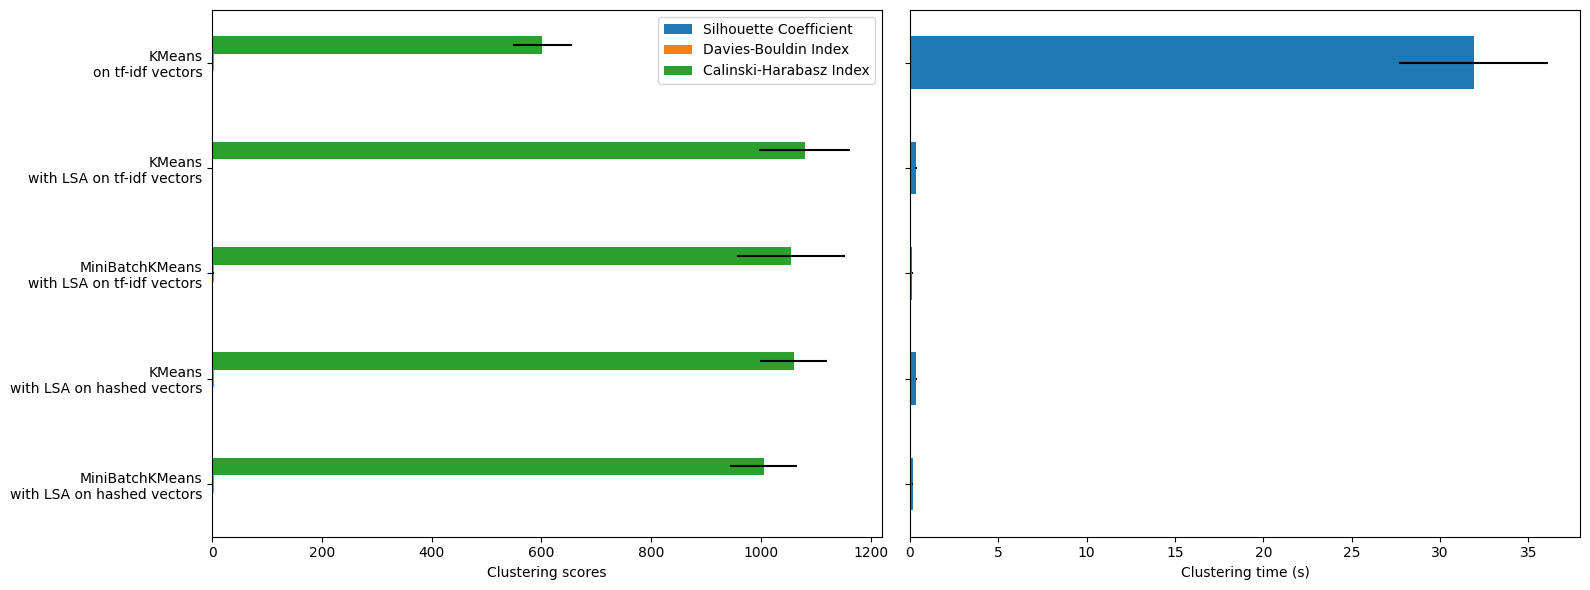

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()